# DS-SF-23 | Auto-MPG and Linear Regression Modeling | Ivan's Notebook

## CODE TO GET YOU STARTED

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model, cross_validation

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'auto-mpg.csv'))

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


## NOT AN ANSWER KEY!!! SEE THIS AS CODE FOR DATA EXPLORATION

In [4]:
df = df.sample(frac = .6, random_state = 1)
df.reset_index(inplace = True)

## `gpm`

In [5]:
df['gpm'] = 1. / df.mpg

In [6]:
df.corr().gpm

index          -0.598300
mpg            -0.935521
cylinders       0.842715
displacement    0.867378
horsepower      0.863464
weight          0.887931
acceleration   -0.458860
model_year     -0.593483
origin         -0.558155
gpm             1.000000
Name: gpm, dtype: float64

## `_sqrt`

In [7]:
df[ ['displacement_sqrt', 'horsepower_sqrt'] ] = df[ ['displacement', 'horsepower'] ].apply(np.sqrt)

## `cylinders`

In [8]:
sorted(df.cylinders.unique())

[3, 4, 5, 6, 8]

In [9]:
df.cylinders.value_counts()

4    125
8     62
6     48
5      2
3      2
Name: cylinders, dtype: int64

## `cylinders` and `gpm`

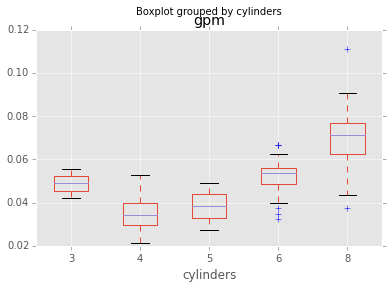

In [10]:
df.boxplot('gpm', by = 'cylinders')

In [11]:
smf.ols(formula = 'gpm ~ cylinders', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     580.7
Date:                                   Prob (F-statistic):           1.13e-65
Time:                                   Log-Likelihood:                 785.05
No. Observations:                 239   AIC:                            -1566.
Df Residuals:                     237   BIC:                            -1559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0023      0.002      1.149      0.252        -0.002     0.006
cylinders      0.0083      0.000     24.098      0.000         0.008     0.009
==============================================================================
Omnibus:                       19.272   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.369
Skew:                           0.326   Prob(JB):                     8.53e-11
Kurtosis:                       5.057   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## `displacement` and `gpm`

C:\Users\Ivan\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


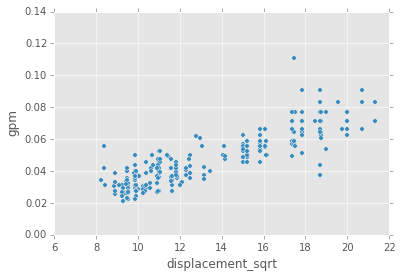

In [12]:
df.plot('displacement_sqrt', 'gpm', kind = 'scatter')

## `horsepower` and `gpm`

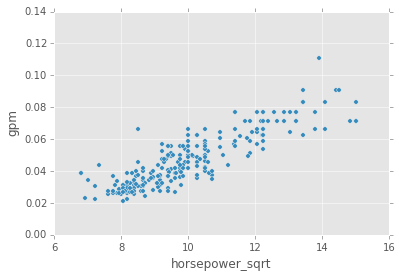

In [13]:
df.plot('horsepower_sqrt', 'gpm', kind = 'scatter')

## `weight` and `gpm`

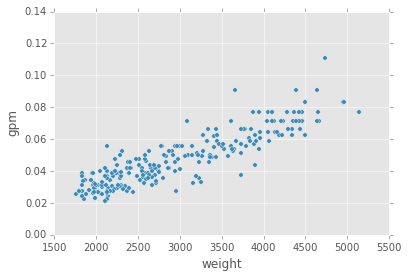

In [14]:
df.plot('weight', 'gpm', kind = 'scatter')

## `gpm`, `cylinders`, `displacement_sqrt`, `horsepower_sqrt`, `weight`

In [15]:
df[ ['gpm', 'cylinders', 'displacement_sqrt', 'horsepower_sqrt', 'weight'] ].corr()

,gpm,cylinders,displacement_sqrt,horsepower_sqrt,weight
gpm,1.000000,0.842715,0.870129,0.868015,0.887931
cylinders,0.842715,1.000000,0.952894,0.849665,0.901871
displacement_sqrt,0.870129,0.952894,1.000000,0.894335,0.937652
horsepower_sqrt,0.868015,0.849665,0.894335,1.000000,0.875021
weight,0.887931,0.901871,0.937652,0.875021,1.000000


In [16]:
smf.ols(formula = 'gpm ~ cylinders + displacement_sqrt + horsepower_sqrt + weight', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     272.6
Date:                                   Prob (F-statistic):           3.17e-86
Time:                                   Log-Likelihood:                 835.03
No. Observations:                 236   AIC:                            -1660.
Df Residuals:                     231   BIC:                            -1643.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -0.0199      0.003     -6.449      0.000        -0.026    -0.014
cylinders             0.0011      0.001      1.273      0.204        -0.001     0.003
displacement_sqrt -7.946e-05      0.001     -0.145      0.885        -0.001     0.001
horsepower_sqrt       0.0034      0.001      5.779      0.000         0.002     0.005
weight             9.354e-06   1.59e-06      5.891      0.000      6.23e-06  1.25e-05
==============================================================================
Omnibus:                       24.058   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.566
Skew:                           0.581   Prob(JB):                     1.55e-09
Kurtosis:                       4.666   Cond. No.                     2.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Removing `displacement_sqrt`

In [17]:
smf.ols(formula = 'gpm ~ cylinders + horsepower_sqrt + weight', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     365.0
Date:                                   Prob (F-statistic):           1.54e-87
Time:                                   Log-Likelihood:                 835.01
No. Observations:                 236   AIC:                            -1662.
Df Residuals:                     232   BIC:                            -1648.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.0198      0.003     -6.469      0.000        -0.026    -0.014
cylinders           0.0011      0.001      1.610      0.109        -0.000     0.002
horsepower_sqrt     0.0034      0.001      6.121      0.000         0.002     0.005
weight           9.248e-06   1.41e-06      6.568      0.000      6.47e-06   1.2e-05
==============================================================================
Omnibus:                       24.447   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.959
Skew:                           0.583   Prob(JB):                     7.74e-10
Kurtosis:                       4.705   Cond. No.                     2.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interactions

In [18]:
formula = 'gpm ~ cylinders + horsepower_sqrt + weight'
formula += ' + cylinders * horsepower_sqrt + cylinders * weight'
formula += ' + horsepower_sqrt * weight'
formula += ' + cylinders * horsepower_sqrt * weight'

smf.ols(formula = formula, data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     158.9
Date:                                   Prob (F-statistic):           5.34e-84
Time:                                   Log-Likelihood:                 838.27
No. Observations:                 236   AIC:                            -1661.
Df Residuals:                     228   BIC:                            -1633.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercept                            0.0884      0.083      1.069      0.286        -0.075     0.251
cylinders                           -0.0069      0.014     -0.480      0.632        -0.035     0.022
horsepower_sqrt                     -0.0094      0.009     -1.100      0.273        -0.026     0.007
weight                           -4.329e-05   3.19e-05     -1.358      0.176        -0.000  1.95e-05
cylinders:horsepower_sqrt            0.0011      0.001      0.820      0.413        -0.002     0.004
cylinders:weight                  4.978e-06   4.75e-06      1.047      0.296     -4.39e-06  1.43e-05
horsepower_sqrt:weight            5.973e-06   3.33e-06      1.794      0.074     -5.87e-07  1.25e-05
cylinders:horsepower_sqrt:weight -6.118e-07   4.67e-07     -1.310      0.191     -1.53e-06  3.08e-07
==============================================================================
Omnibus:                       28.187   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.952
Skew:                           0.676   Prob(JB):                     6.37e-11
Kurtosis:                       4.716   Cond. No.                     4.49e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
smf.ols(formula = 'gpm ~ horsepower_sqrt + weight', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     542.5
Date:                                   Prob (F-statistic):           2.12e-88
Time:                                   Log-Likelihood:                 833.70
No. Observations:                 236   AIC:                            -1661.
Df Residuals:                     233   BIC:                            -1651.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.0209      0.003     -6.954      0.000        -0.027    -0.015
horsepower_sqrt     0.0037      0.001      6.864      0.000         0.003     0.005
weight           1.065e-05   1.11e-06      9.589      0.000      8.46e-06  1.28e-05
==============================================================================
Omnibus:                       23.408   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.863
Skew:                           0.616   Prob(JB):                     2.69e-08
Kurtosis:                       4.424   Cond. No.                     2.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
smf.ols(formula = 'gpm ~ cylinders + weight', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     465.7
Date:                                   Prob (F-statistic):           1.18e-82
Time:                                   Log-Likelihood:                 828.09
No. Observations:                 239   AIC:                            -1650.
Df Residuals:                     236   BIC:                            -1640.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0041      0.002     -2.337      0.020        -0.008    -0.001
cylinders      0.0022      0.001      3.315      0.001         0.001     0.004
weight      1.337e-05   1.32e-06     10.116      0.000      1.08e-05   1.6e-05
==============================================================================
Omnibus:                       28.374   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.568
Skew:                           0.509   Prob(JB):                     1.06e-16
Kurtosis:                       5.520   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
smf.ols(formula = 'gpm ~ cylinders + horsepower_sqrt', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     445.4
Date:                                   Prob (F-statistic):           2.47e-80
Time:                                   Log-Likelihood:                 814.89
No. Observations:                 236   AIC:                            -1624.
Df Residuals:                     233   BIC:                            -1613.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.0244      0.003     -7.532      0.000        -0.031    -0.018
cylinders           0.0037      0.001      6.638      0.000         0.003     0.005
horsepower_sqrt     0.0052      0.001      9.704      0.000         0.004     0.006
==============================================================================
Omnibus:                       17.207   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.038
Skew:                           0.434   Prob(JB):                     8.16e-07
Kurtosis:                       4.449   Cond. No.                         76.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## `scikit-learn`

In [22]:
df = pd.read_csv(os.path.join('..', 'datasets', 'auto-mpg.csv'))

In [23]:
df['gpm'] = 1. / df.mpg
df['horsepower_sqrt'] = np.sqrt(df.horsepower)

In [24]:
len(df)

398

In [25]:
df = df.dropna(axis = 0, subset = ['gpm', 'cylinders', 'horsepower_sqrt', 'weight'])

In [26]:
len(df)

392

In [27]:
train_df = df.sample(frac = .6, random_state = 1)
test_df = df.drop(train_df.index)

## `cylinders`, `horsepower_sqrt`, and `weight`

In [28]:
train_X = train_df[ ['cylinders', 'horsepower_sqrt', 'weight'] ]
train_y = train_df.gpm

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.78773531639106564

## `horsepower_sqrt` and `weight`

In [29]:
train_X = train_df[ ['horsepower_sqrt', 'weight'] ]
train_y = train_df.gpm

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.78921906858910851

## `cylinders` and `weight`

In [30]:
train_X = train_df[ ['cylinders', 'weight'] ]
train_y = train_df.gpm

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.7496867266311803

## `cylinders` and `horsepower_sqrt`

In [31]:
train_X = train_df[ ['cylinders', 'horsepower_sqrt'] ]
train_y = train_df.gpm

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.75607824485117603

## `horsepower_sqrt`, `weight`, and interaction (`horsepower_sqrt * weight`)

In [32]:
train_df['horsepower_sqrt * weight'] = train_df.horsepower_sqrt * train_df.weight

In [33]:
train_X = train_df[ ['horsepower_sqrt', 'weight', 'horsepower_sqrt * weight'] ]
train_y = train_df.gpm

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.78884296946344445

## `horsepower_sqrt` and `weight`

In [34]:
def linear_modeling_with_sklearn(X, y):
    model = linear_model.LinearRegression()
    model.fit(X, y)

    print 'R^2 =', model.score(X, y)
    print 'Coefficients'
    print '- beta_0 (intercept) =', model.intercept_
    print '- beta_n (n > 0)     =', model.coef_

    return model

In [35]:
train_X = train_df[ ['horsepower_sqrt', 'weight'] ]
train_y = train_df.gpm

model = linear_modeling_with_sklearn(train_X, train_y)

R^2 = 0.811803192251
Coefficients
- beta_0 (intercept) = -0.0225255971551
- beta_n (n > 0)     = [  4.05837499e-03   9.88544479e-06]


In [36]:
test_X = test_df[ ['horsepower_sqrt', 'weight'] ]
test_y = test_df.gpm

model.score(test_X, test_y)

0.81302558221221155

In [37]:
X = df[ ['horsepower_sqrt', 'weight'] ]
y = df.gpm

model = linear_modeling_with_sklearn(X, y)

R^2 = 0.813851551351
Coefficients
- beta_0 (intercept) = -0.0192272729081
- beta_n (n > 0)     = [  3.37066236e-03   1.11256489e-05]
